# Linear Image Denoising

This numerical tour introduces basic image denoising methods.

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [2]:
#from __future__ import division
#from nt_toolbox.general import *
#from nt_toolbox.signal import *
#%pylab inline
#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

using PyPlot
using NtToolBox
using Distributions


## Noisy Image Formation

In these numerical tour, we simulate noisy acquisition by adding some
white noise (each pixel is corrupted by adding an independant Gaussian
variable).


This is useful to test in an oracle maner the performance of our methods.


Size $N = n \times n$ of the image.

In [3]:
n = 256
N = n^2

65536

We load a clean image $x_0 \in \RR^N$.

In [4]:
name = "NtToolBox/src/data/flowers.png"
x0 = load_image(name, n)

256×256 Array{Float32,2}:
 0.0810458  0.0708651  0.073018  0.0688045  …  0.164796  0.166362  0.17908 
 0.180208   0.165931   0.151181  0.14029       0.355283  0.33306   0.398356
 0.189173   0.174437   0.177527  0.150548      0.380539  0.357518  0.432745
 0.193602   0.171468   0.174814  0.166166      0.392341  0.388712  0.354867
 0.19777    0.192449   0.186573  0.168731      0.432168  0.371118  0.359275
 0.209535   0.207382   0.194926  0.177941   …  0.418712  0.373805  0.390813
 0.194372   0.194372   0.186233  0.186265      0.428242  0.479633  0.426949
 0.187912   0.185376   0.184475  0.187427      0.381193  0.448724  0.408519
 0.19534    0.189814   0.188091  0.187358      0.355003  0.324013  0.356198
 0.178608   0.185095   0.187197  0.174084      0.291936  0.357843  0.359449
 0.170166   0.178657   0.183441  0.159477   …  0.324552  0.313814  0.333511
 0.164782   0.162433   0.161924  0.148605      0.383556  0.308191  0.34721 
 0.155864   0.14483    0.148174  0.145226      0.394226  0.316

Display the clean image.

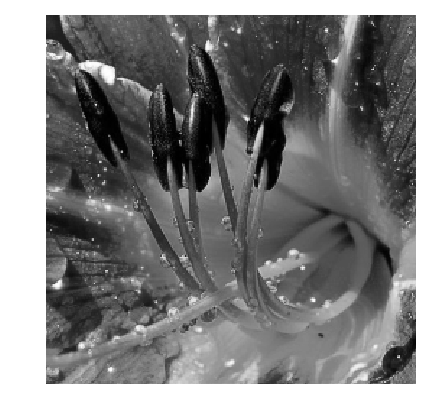

In [5]:
imageplot(x0)

Variance of the noise.

In [6]:
sigma = .08

0.08

We add some noise to it to obtain the noisy signal $y = x_0 + w$.
Here $w$ is a realization of a Gaussian white noise of variance
$\si^2$.

In [7]:
y = x0 .+ sigma.*rand(Normal(), 256, 256)

256×256 Array{Float64,2}:
 0.0846743  0.191131   0.107639   0.14781    …  0.154663  0.185995  0.242534
 0.168688   0.196709   0.178029   0.0977075     0.411722  0.279046  0.334125
 0.346261   0.147682   0.172914   0.140985      0.281199  0.331116  0.548548
 0.151463   0.138004   0.260822   0.223134      0.319844  0.497606  0.343365
 0.159061   0.0928239  0.244178   0.155761      0.584717  0.254802  0.345522
 0.316719   0.268412   0.211565   0.253067   …  0.319858  0.511646  0.320477
 0.141258   0.0537995  0.157956   0.186583      0.344179  0.468265  0.396619
 0.226494   0.122523   0.369719   0.248079      0.309758  0.298933  0.558995
 0.240297   0.203152   0.194951   0.205016      0.326283  0.229844  0.272974
 0.216885   0.123106   0.162853   0.0702793     0.405472  0.304974  0.357776
 0.143724   0.26826    0.0596335  0.294108   …  0.315537  0.331187  0.282903
 0.166512   0.110663   0.239293   0.154248      0.455064  0.392939  0.336054
 0.25116    0.128854   0.123153   0.231776      0.

Display the noisy image.

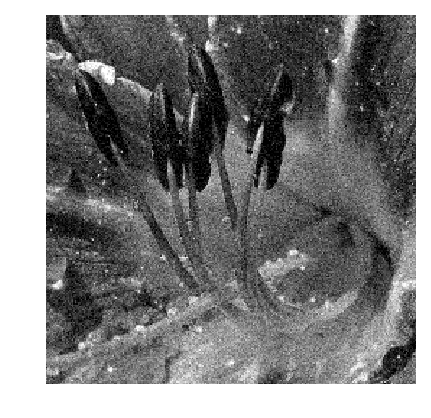

In [8]:
imageplot(clamP(y))

## Linear Image Denoising

We consider a noising estimator $x \in \RR^N$ of $x_0$ that only
depends on the observation $y$. Mathematically speaking, it is thus a
random vector that depends on the noise $w$.


A translation invariant linear denoising is necessarely a convolution
with a kernel $h$
$$ x = x_0 \star h $$
where the periodic convolution between two 2-D arrays is defined as
$$ (a \star b)_i = \sum_j a(j) b(i-j). $$


It can be computed over the Fourier domain as
$$ \forall \om, \quad \hat x(\om) = \hat x_0(\om) \hat h(\om). $$

In [9]:
cconv = (a, b) -> real(plan_ifft((plan_fft(a)*a).*(plan_fft(b)*b))*((plan_fft(a)*a).*(plan_fft(b)*b)))

(::#1) (generic function with 1 method)

We use here a Gaussian fitler $h$ parameterized by
the bandwith $\mu$.

In [10]:
normalize = h -> h/sum(h)

X = [0:n/2; -n/2:-2]'
Y = [0:n/2; -n/2:-2]

h = mu -> normalize(exp(-(X.^2 .+ Y.^2)/(2*(mu)^2)))

(::#5) (generic function with 1 method)

Display the filter $h$ and its Fourier transform.

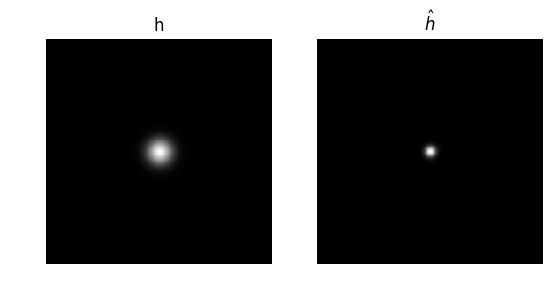

PyObject <matplotlib.text.Text object at 0x00000000236566D8>

In [11]:
mu = 10
subplot(1,2, 1)
imageplot(fftshift(h(mu)))
title("h")
subplot(1,2, 2)
imageplot(fftshift(real(plan_fft(h(mu))*h(mu))))
title(L"$\hat h$")

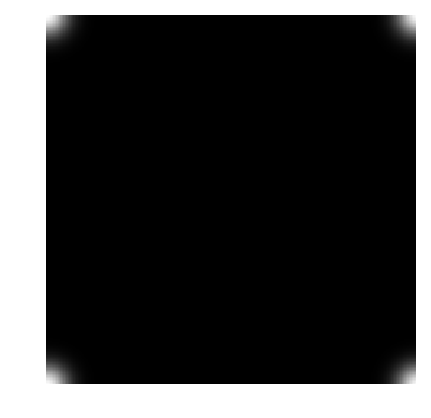

In [12]:
imageplot(h(mu))

Shortcut for the convolution with $h$.

In [13]:
denoise = (x, mu) -> cconv(h(mu), x)

(::#7) (generic function with 1 method)

Display a denoised signal.

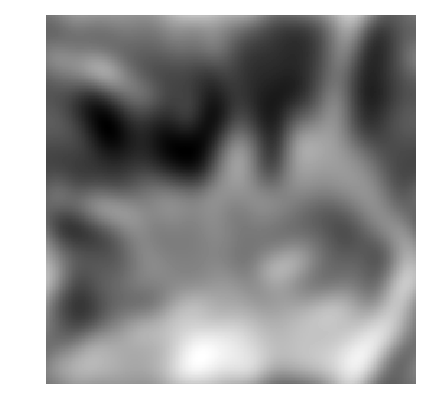

In [14]:
imageplot(denoise(y, mu))

**Exercise 1:** Display a denoised signal for several values of $\mu$.

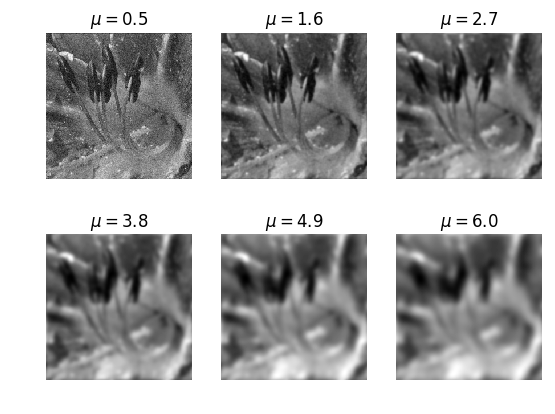

In [17]:
#run -i nt_solutions/denoisingsimp_2b_linear_image/exo1
include("Exos\\denoisingsimp_2b_linear_image\\exo1.jl")

**Exercise 2:** Display the evolution of the oracle denoising error
$ \norm{y-x_0} $ as a function of $\mu$.
Set $\mu$ to the value of the optimal parameter. 

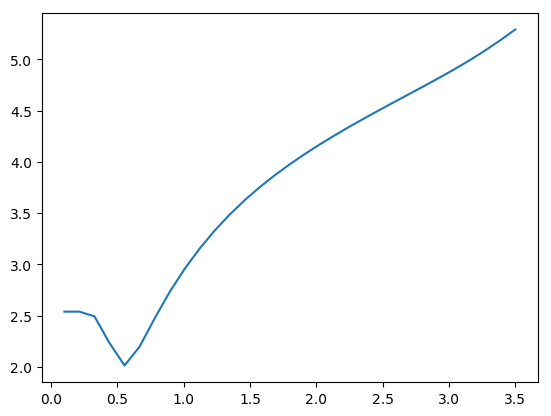

0.5533333333333333

In [49]:
#run -i nt_solutions/denoisingsimp_2b_linear_image/exo2
#include("Exos\\denoisingsimp_2b_linear_image\\exo2.jl")

mulist = linspace(.1, 3.5, 31)
# err = arrayfun(@(mu)norm(x0-denoise(y,mu), 'fro' ), mulist);
err = zeros(length(mulist))
for i in 1 : length(mulist)
	mu = mulist[i]
	err[i] = norm(x0 - denoise(y, mu))
end

clf
h1, = plot(mulist,err); axis("tight");
#plot(mulist,err); axis("tight")
# set_label('\mu', '|y-x_0|');
# retrieve the best denoising result
i = mapslices(indmin, err, 1)[1]
mu = mulist[i]





Display the results.

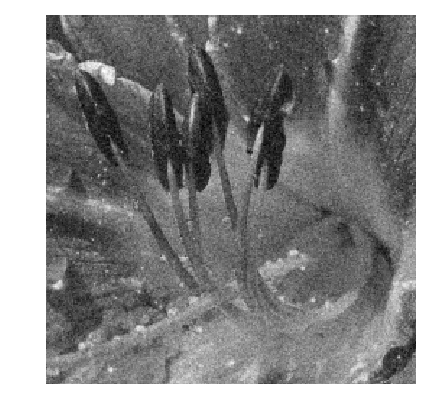

In [55]:
imageplot(denoise(y, mu))

## Wiener Filtering

We suppose here that $x_0$ is a realization of a random vector $x_0$,
whose distribution is Gaussian with a stationary covariance $c$,
and we denote $P_{X_0}(\om) = \hat c(\om)$ the power-spectrum of
$x_0$.


Recall that $w$ is a realization of a random vector $W$
distributed according to $\Nn(0,\si^2 \text{Id})$.


The (oracle) optimal filter minimizes the risk
$$ R(h) = \EE_{W,X_0}( \norm{ X_0 - h \star (X_0 + W) }^2 ). $$


One can show that the solution of this problem, the so-called Wiener filter,
is defined as
$$ \forall \om, \quad \hat h(\om) = \frac{ P_{X_0}(\om) }{ P_{X_0}(\om) + \si^2 }. $$


We estimate $ P_{X_0} $ using the periodogram associated to the
realization $x_0$, i.e.
$$ P_{X_0} \approx \frac{1}{N}\abs{\hat x_0}^2. $$

In [121]:
P = 1/N .* ( abs(plan_fft(x0)*x0).^2 )

256×256 Array{Float32,2}:
 8171.9       10.6164      6.01625      …   6.01625      10.6164   
  169.968     24.6843     10.2284           1.90513       0.254991 
   49.7285    39.1475      0.898326         1.20455      10.2768   
   10.1713     1.2197      1.95005          1.68784       6.31295  
    8.99825    0.987353    2.41802          4.17762       1.15039  
    5.96493    1.35605     1.88494      …   4.59954       0.418063 
    4.29223    0.304442    1.00316          3.27167       2.55866  
    2.56278    0.538486    0.474422         0.102042      0.770294 
    0.524596   1.56068     0.277281         2.62287       0.421342 
    0.833512   0.494591    0.142519         0.295279      1.38228  
    0.767665   0.682859    0.43622      …   1.44202       1.36096  
    1.18919    0.281352    0.0069366        0.462007      0.0384869
    0.372797   0.118761    0.204467         0.000695693   0.205559 
    ⋮                                   ⋱                 ⋮        
    0.372797   0.20555

Compute the approximate Wiener filter.

In [81]:
h_w = real(plan_ifft(P ./ (P .+ sigma^2))*(P ./ (P .+ sigma^2)))

256×256 Array{Float32,2}:
 0.254668      0.0780854     0.0148397    …   0.0148397     0.0780854  
 0.10135       0.036271      0.00687797       0.00567823    0.0351686  
 0.027534      0.0139063     0.000751491     -0.000287227   0.00976046 
 0.0103443     0.00470589    0.000710394     -0.00066084    0.00392393 
 0.00296009    0.00106851    0.000844462      3.25599f-5    0.00266379 
 0.00104208    0.00143793    0.00153131   …   0.00162988    0.00190061 
 0.00146124   -0.000180944   0.000411345      0.000759974   0.00112181 
 0.000880367  -9.21841f-5    0.0010208       -0.000365944  -0.00039197 
 0.00208328    0.00143564    0.00146518       0.000837262   6.01103f-5 
 0.00178375   -0.00052092   -1.86634f-5       0.00207347    0.00118471 
 0.000795316  -0.00142652   -0.000958989  …   6.25124f-5   -0.000555224
 0.00051408   -0.000763624  -0.00123228       0.000345681  -0.00163507 
 0.000899492  -0.00059521   -0.00108793       0.000685518  -0.00135931 
 ⋮                                    

Note that this is a theoretical filter, because in practice one does not
have access to $x_0$. Display it.

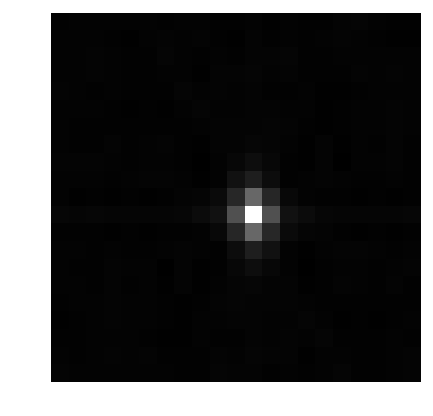

In [82]:
u = fftshift(h_w)
imageplot( u[Int(n/2 - 10) : Int(n/2 + 10), Int(n/2 - 10) : Int(n/2 + 10)] )

Display the denoising result.

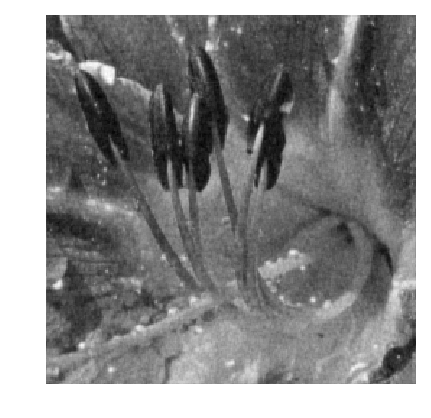

In [122]:
imageplot( cconv(y, h_w) )

Note that this denoising is not very efficient, because the hypothesis of
stationarity of $X_0$ is not realistic for such piecewise-regular
signal.